In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv('/content/airline_passengers.csv',usecols=[1])

In [3]:
data.head()

,Thousands of Passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [4]:
data.dropna(inplace = True)

<Axes: >

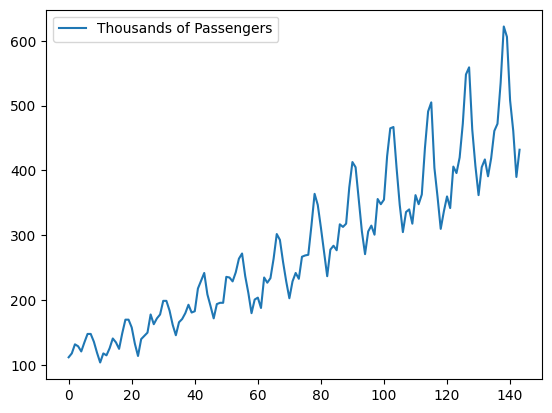

In [5]:
data.plot()

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
df = scaler.fit_transform(data)

In [8]:
df.max(),df.min()

(1.0, 0.0)

In [9]:
train_size = round(len(df)*0.8)
train = df[:train_size,:]
test = df[train_size:len(df),:]
train.shape,test.shape

((115, 1), (29, 1))

In [19]:
def get_values(data,look_back = 1):
  data_x = []
  data_y = []
  for i in range(len(data)-look_back):
    a = data[i:(i+look_back),:]
    data_x.append(a)
    data_y.append(data[i+look_back,:])
  return np.array(data_x),np.array(data_y)

In [20]:
look_back=1

In [21]:
xtrain,ytrain = get_values(train,look_back = look_back)

In [31]:
xtrain[113],ytrain[113],train[113:115]

(array([[0.63899614]]),
 array([0.74710425]),
 array([[0.63899614],
        [0.74710425]]))

In [32]:
len(xtrain),len(ytrain),len(train)

(114, 114, 115)

In [33]:
xtest,ytest = get_values(test,look_back = look_back)

In [34]:
len(xtest),len(ytest),len(test)

(28, 28, 29)

In [ ]:
#LSTM takes the input data (X) to be provided with a specific array structure in
#the form of [samples, time steps, features].
#Currently, the data is in the form of [samples, features]

In [ ]:
# reshape input to be [samples, time steps, features]
xtrain = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
xtest = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))

In [ ]:
#del model

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4,input_shape = (1,look_back)))
model.add(tf.keras.layers.Dense(1))

In [36]:
model.compile('adam','mean_squared_error')

In [37]:
model.fit(xtrain,ytrain,batch_size = 1, epochs = 100)

Epoch 1/100
114/114 [==============================] - 3s 2ms/step - loss: 0.0669
Epoch 2/100
114/114 [==============================] - 0s 4ms/step - loss: 0.0342
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 10/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 11/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 12/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 13/100


In [38]:
ypred = model.predict(xtest)

1/1 [==============================] - 1s 507ms/step


In [39]:
ypred = scaler.inverse_transform(ypred)
ytest = scaler.inverse_transform(ytest)

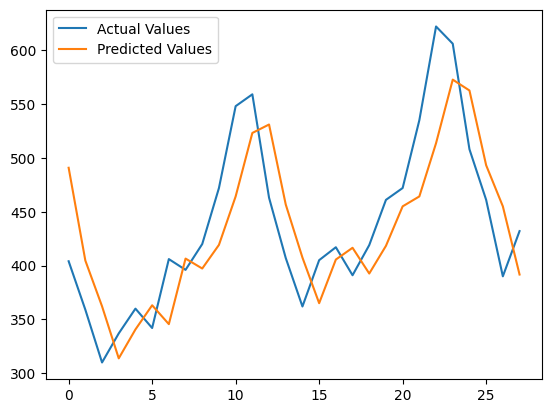

In [40]:
plt.plot(ytest,label = 'Actual Values')
plt.plot(ypred,label = 'Predicted Values')
plt.legend()
plt.show()

In [41]:
scaler = MinMaxScaler()
df = scaler.fit_transform(data)

In [42]:
df.max(),df.min()

(1.0, 0.0)

In [43]:
train_size = round(len(df)*0.8)
train = df[:train_size,:]
test = df[train_size:len(df),:]
train.shape,test.shape

((115, 1), (29, 1))

In [44]:
xtrain,ytrain = get_values(train,look_back = look_back)

In [45]:
xtest,ytest = get_values(test,look_back = look_back)

In [46]:
# reshape input to be [samples, time steps, features]
xtrain = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
xtest = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))

In [48]:
#del model

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4,input_shape = (1,look_back)))
model.add(tf.keras.layers.Dense(1))

In [50]:
model.compile('SGD','mean_squared_error')

In [51]:
model.fit(xtrain,ytrain,batch_size = 1, epochs = 50)

Epoch 1/50
114/114 [==============================] - 5s 4ms/step - loss: 0.0448
Epoch 2/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0306
Epoch 3/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 4/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 5/50
114/114 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 6/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 7/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 8/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0280
Epoch 9/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 10/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 11/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 12/50
114/114 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 13/50
114/114 [====

In [52]:
ypred = model.predict(xtest)

1/1 [==============================] - 0s 439ms/step


In [53]:
ypred = scaler.inverse_transform(ypred)
ytest = scaler.inverse_transform(ytest)

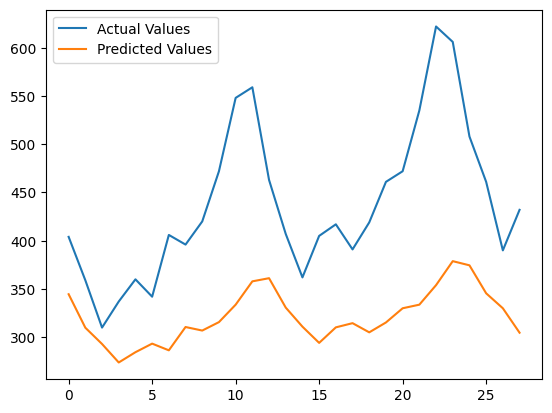

In [54]:
plt.plot(ytest,label = 'Actual Values')
plt.plot(ypred,label = 'Predicted Values')
plt.legend()
plt.show()

In [ ]:
'''adam with more epochs is predicting the values better incomparison to SGD with less Epochs also
I have used batch gradient descent which gives better accuracy when compared to other gradients and
also this dataset is smaller so it not cause any convergance issue with the batch GD.